## Data-driven Astronomy
#### 1b – Week 1: Calculating the mean stack 

In [1]:
# using the mean function in the Python statistics module
from statistics import mean
L = [1, 2.2, 0.3, 3.4, 7.9]
#L = [23.3, 42.1, 2.0, -3.2, 55.6]

fluxes = L # [23.3, 42.1, 2.0, -3.2, 55.6]
m = mean(fluxes)
print(m)

2.96


In [2]:
# calculate mean manually
fluxes = L # [23.3, 42.1, 2.0, -3.2, 55.6]
m = sum(fluxes)/len(fluxes)
print(m)

2.96


In [3]:
# Write your calculate_mean function here.
def calculate_mean(list):
    return sum(list) / max(len(list), 1)

In [4]:
# You can use this to test your function.
# Any code inside this `if` statement will be ignored by the automarker.
if __name__ == '__main__':
    # Run your `calculate_mean` function with examples:
    mean = calculate_mean(L) #1,2.2,0.3,3.4,7.9])
    print(mean)

2.96


In [5]:
# using NumPy for optimized array
import numpy as np

#L = [23.3, 42.1, 2.0, -3.2, 55.6]
fluxes = np.array(L)
m = np.mean(fluxes)
print(m)
print(np.size(fluxes)) # length of array
print(np.std(fluxes))  # standard deviation

2.96
5
2.68670802284


In [6]:
print(np.size(fluxes)) # length of array
print(np.std(fluxes))  # standard deviation

5
2.68670802284


In [7]:
# Write your calc_stats function here.
# my sample
import numpy as np

# calc_stats(filename) returns (mean, median)
#   the first value as the mean 
#   the second value is the median. 
# You can round your results using NumPy's round function. 
def calc_stats(fname):
    data = np.loadtxt(fname, delimiter=',')
    print(data, '\n')
    #print(np.size(data)) # length of array
    #print(np.std(data)) # standard deviation
    mean = np.round( np.mean(data), 1)
    median = np.round( np.median(data), 1)
    return (mean, median)

# You can use this to test your function.
# Any code inside this `if` statement will be ignored by the automarker.
if __name__ == '__main__':
    # Run your `calc_stats` function with examples:
    folder = 'sets1/'
    fname = 'data.csv'
    #fname = 'data2.csv'
    #fname = 'data3.csv'
    mean = calc_stats(folder+fname) #('data.csv')
    print(mean)

[[  8.84  17.22  13.22   3.84]
 [  3.99  11.73  19.66   1.27]
 [ 16.14  18.72   7.43  11.09]] 

(11.1, 11.4)


In [8]:
# notes from data-driven astronomy
data = []
for line in open('sets1/data.csv'):
  row = []
  for col in line.strip().split(','):
    row.append(float(col))
  data.append(row)

print(data)

[[8.84, 17.22, 13.22, 3.84], [3.99, 11.73, 19.66, 1.27], [16.14, 18.72, 7.43, 11.09]]


In [9]:
# notes from data-driven astronomy
import numpy as np

data = []
for line in open('sets1/data.csv'):
  data.append(line.strip().split(','))

data = np.asarray(data, float)
print(data)

[[  8.84  17.22  13.22   3.84]
 [  3.99  11.73  19.66   1.27]
 [ 16.14  18.72   7.43  11.09]]


In [10]:
# notes from data-driven astronomy
import numpy as np
data = np.loadtxt('sets1/data.csv', delimiter=',')
print(data)

[[  8.84  17.22  13.22   3.84]
 [  3.99  11.73  19.66   1.27]
 [ 16.14  18.72   7.43  11.09]]


In [11]:
# Unlike Python lists, NumPy arrays support numerical operations 
# on entire arrays, either as element-wise or matrix operations. 
import numpy as np

a = np.array([1, 2, 3])
b = np.array([4, 5, 6])

# Element-wise multiplication 
print(a*2)

# Element-wise summation 
print(a + b)

# Element-wise product 
print(a*b)


[2 4 6]
[5 7 9]
[ 4 10 18]


In [12]:
# Rows or columns can be accessed using slicing, as shown below:
import numpy as np

a = np.array([[1,2,3], [4,5,6]])  # 2x3 array

# Print first row of a:
print(a[0,:])

# Print second column of a:
print(a[:,1])


[1 2 3]
[2 5]


#### Opdracht

 Write a <code>mean_datasets</code> function that reads in a list of CSV files and returns an array of the mean of each cell in the data files.

The files each contain n rows and m columns, giving a total of n x m cells. The individual cells are separated by commas, and all CSV files in the list will have the same number of rows and columns.

The result should have the same dimensions as the input files. The result should be a NumPy array with individual entries rounded to one decimal place.

Suppose we want to use the three files data1.csv, data2.csv and data3.csv. Your function should then take a list of the filenames and return the following:
<code>
mean_datasets(['data1.csv', 'data2.csv', 'data3.csv'])

array([[ 11.   11.9  13. ]
       [  9.5   6.8   9.4]
       [  7.2  11.1  12.5]
       [  8.8   7.3   9.2]
       [ 16.6  10.6  10.3]])  
</code>

For example, the 11.0 in the top-left cell is the mean of 7.98631, 12.65900, and 12.47115 (rounded to 1 decimal place). These values are from the first row and column of each CSV file.

Here's another sample output that your function should produce given the three files data4.csv, data5.csv, and data6.csv:
<code>
mean_datasets(['data4.csv', 'data5.csv', 'data6.csv'])

array([[-2.9  2.6  0.6 -5.4]
       [-4.4 -0.7  0.7 -0.2]
       [-1.7  2.5 -8.7 -5.4]])
</code>


In [13]:
import numpy as np

def mean_datasets(filenames):
    n = len(filenames) # calculate number of files
    if n > 0:
        data = np.loadtxt(filenames[0], delimiter=',') # load data from first file
        for i in range(1,n):
            data += np.loadtxt(filenames[i], delimiter=',') # add data of all other files
    
        # caculate Mean across all files:
        data_mean = data/n        
        # round all data to 1 decimal
        return np.round(data_mean, 1)

In [14]:
folder = 'sets2/'
print(mean_datasets([folder+'data1.csv', folder+'data2.csv', folder+'data3.csv']))

print ('\n')

print(mean_datasets([folder+'data4.csv', folder+'data5.csv', folder+'data6.csv']))

[[ 11.   11.9  13. ]
 [  9.5   6.8   9.4]
 [  7.2  11.1  12.5]
 [  8.8   7.3   9.2]
 [ 16.6  10.6  10.3]]


[[-2.9  2.6  0.6 -5.4]
 [-4.4 -0.7  0.7 -0.2]
 [-1.7  2.5 -8.7 -5.4]]


### FITS images

One of the most widely used formats for astronomical images is the Flexible Image Transport System. In a FITS file, the image is stored in a numerical array, which we can load into a NumPy array.

FITS files also have headers which store metadata about the image.

FITS files are a standard format and astronomers have developed many libraries (in many programming languages) that can read and write FITS files. We're going to use the Astropy module.

The following code shows how we can open a FITS file and print out its header information:

In [1]:
from astropy.io import fits
folder = 'fits/'
fname = 'Astro_UIT.fits'

#hdulist = fits.open('image0.fits')
hdulist = fits.open(folder+fname)
hdulist.info()

Filename: fits/Astro_UIT.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU     131   (512, 512)   int16 (rescales to float32)   


Opening a FITS file in Astropy returns a HDU (Header/Data Unit) list. Each HDU stores headers and (optionally) image data.

The header contains metadata about the HDU object, e.g. its dimensions and data type. Every HDU can contain image data. The first HDU is called the primary HDU.

If we want to access individual HDUs, we can index the HDU list object returned by fits.open. The image data can be accessed using the data attribute.

You often want to visualise the image data stored in FITS files. We can do this using the plotting library matplotlib.

This example creates a 2D plot a FITS image: 

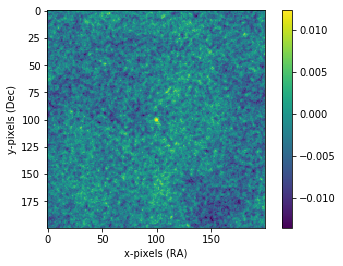

In [6]:
from astropy.io import fits
import matplotlib.pyplot as plt

folder = 'fits/median/' #do not forget closing '/'
#fname = 'Astro_UIT.fits'
#fname = 'HST_WFPC_II.fits'
fname = 'image0.fits'

#hdulist = fits.open('image0.fits')
hdulist = fits.open(folder+fname)
data = hdulist[0].data

# Plot the 2D array
plt.imshow(data, cmap=plt.cm.viridis)
plt.xlabel('x-pixels (RA)')
plt.ylabel('y-pixels (Dec)')
plt.colorbar()
plt.show()

### OPDRACHT

Write a load_fits function that loads in a FITS file and finds the position of the brightest pixel (i.e. the maximum value) in its image data. To make this function work for arbitrary files, pass the name of the FITS file as an argument to the function.

Using the file image0.fits from the previous examples, your program should work like this: 
<code>
load_fits('image0.fits')
(100, 100)
</code>

### Sample solution

To solve this problem, you will need to use the Astropy module to read in the FITS files and to extract the image data, as we've seen on the two previous slides.

Then, to find the brightest pixel of the image we are looking for the largest value in the 2D array. The <code>argmax</code> function from numpy provides precisely this functionality: it searches for the largest value in the array and returns its position. 

However, if you've printed out the result of argmax on its own you would have found that it does not return a tuple of x and y coordinates but just a single index. 

Why is that? This function works on a flattened (or ravelled) array, i.e. the array gets converted to a 1D array internally before the maximum is found. To revert this, or to "unravel" the result, we can call the function <code>unravel_index</code> and pass it the dimension of the initial data array as second argument.

(100, 100)


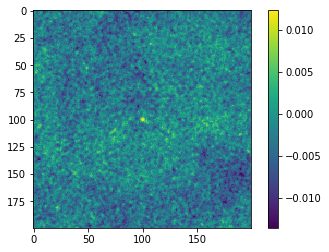

In [7]:
import numpy as np
from astropy.io import fits

# Write your load_fits function here.
def load_fits(fname):
    hdulist = fits.open(fname)
    data = hdulist[0].data
    
    arg_max = np.argmax(data) #get maximum
    max_pos = np.unravel_index(arg_max, data.shape) #unravel index
    return max_pos #return tuple (x,y)

if __name__ == '__main__':
    # Run your `load_fits` function with examples:
    folder = 'fits/median/'
    fname = 'image1.fits' # name of FITS file
    #fname = 'image2.fits' # name of FITS file
    #fname = 'image3.fits' # name of FITS file
    bright = load_fits(folder+fname)
    print(bright)

    # You can also confirm your result visually:
    from astropy.io import fits
    import matplotlib.pyplot as plt

    hdulist = fits.open(folder+fname)
    data = hdulist[0].data

    # Plot the 2D image data
    plt.imshow(data.T, cmap=plt.cm.viridis)
    plt.colorbar()
    plt.show()

### calculating the mean of a stack of FITS files.

In this set of activities we've covered basic file reading and data manipulation techniques. You have learned how to load data and store it in either Python lists or NumPy arrays, and how to perform basic operations on both types of data.

The examples contained calculations of the mean of one- and two-dimensional datasets in a variety of ways.

We moved on to FITS files and how to load FITS files, visualise the image data, and extract specific information from the image.

Now we will put everything together and round up this module by calculating the mean of a stack of FITS files. Each individual file may or may not have a detected pulsar, but in the final stack you should be able to see a clear detection.


### OPDRACHT
Write a mean_fits function that takes a list of FITS files as an argument, reads them in, and returns the mean image data of the FITS files. All the images have the same dimensions and your calculated mean array should match those dimensions.

Your function should be able to process an arbitrary number of files. If you're unsure how to do that, take a look at the sample solutions to the previous problems.

The mean stack of these files will be a large 200 x 200 array, so we will only look at the central value of your returned array, which is where we expect the pulsar to be.

For the files image0.fits, image1.fits and image2.fits, your program should work like this: 
<code>
mean_fits(['image0.fits', 'image1.fits', 'image2.fits'])[100, 100]
0.017356586332122486
</code>
We can access the mean at x=100, y=100 using the index operator right after the function call, as we expect its return value to be an array. 

The central mean value for the files image0.fits, image1.fits, and image3.fits should be: 
<code>
mean_fits(['image0.fits', 'image1.fits', 'image3.fits'])[100, 100]
0.01006323037048181
</code>

Using all the FITS files provided (images 0 to 4), your program should work like this:
<code>
mean_fits(['image0.fits', 'image1.fits', 'image2.fits', 'image3.fits', 'image4.fits'])[100, 100]
0.014150320738554
</code>

### SAMPLE SOLUTION
Our solution to this problem is very similar to the one for the problem with multiple csv-files. To make our function work with an arbitrary number of files, we calculate the length of the input list upfront, read in and store the first data set of the list and then loop over the remaining files, adding the data to our existing data on the fly.

By calling hdulist.close() we free up the memory this file has taken up while we were working with it.

After we've read in and summed up all the files, we divide the array (element-wise) by the number of files and return the resulting mean stack.

0.014150320738554


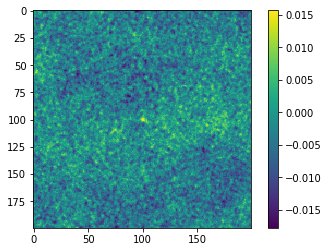

In [12]:
from astropy.io import fits
import numpy as np

def mean_fits(filenames):
    n = len(filenames)
    if n > 0:
        
        # get the data of first file
        hdulist = fits.open(filenames[0])
        data = hdulist[0].data
        hdulist.close() # free up memory by closing file
        
        # add data of all the other data-files
        for i in range(1, n):
            hdulist = fits.open(filenames[i])
            data += hdulist[0].data
            hdulist.close()
        
        mean = data / n
        return mean

if __name__ == '__main__':
  
  # Test your function with examples from the question
    folder = 'fits/mean/'
    #data  = mean_fits([folder+'image0.fits', folder+'image1.fits', folder+'image2.fits'])
    #data = mean_fits([folder+'image0.fits', folder+'image1.fits', folder+'image3.fits'])
    data = mean_fits([folder+'image0.fits', folder+'image1.fits', folder+'image2.fits', folder+'image3.fits', folder+'image4.fits'])
    print(data[100, 100])

    # You can also plot the result:
    import matplotlib.pyplot as plt
    plt.imshow(data.T, cmap=plt.cm.viridis)
    plt.colorbar()
    plt.show()